## eCommerce Customer Churn Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_decomposition import CCA

In [4]:
df = pd.read_csv(r"c:\Users\singh\OneDrive\Desktop\Python\Data\ecommerce_customer_churn_dataset - ecommerce_customer_churn_dataset.csv")
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [5]:
## Basic Info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  int64  
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [6]:
## Statistical info of Data
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


In [7]:
## Checking Missing Values
df.isnull().sum()

Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64

### Handling Missing Values

In [8]:
empty = ['Age', 'Session_Duration_Avg', 'Pages_Per_Session', 'Wishlist_Items', 'Days_Since_Last_Purchase', 'Discount_Usage_Rate',
         'Returns_Rate', 'Email_Open_Rate', 'Customer_Service_Calls', 'Product_Reviews_Written', 'Social_Media_Engagement_Score',
         'Mobile_App_Usage', 'Payment_Method_Diversity', 'Credit_Balance']
imputer = SimpleImputer(strategy='mean')
df[empty] = imputer.fit_transform(df[empty])

In [9]:
## Checking if there are any missing values left
df.isnull().sum()

Age                              0
Gender                           0
Country                          0
City                             0
Membership_Years                 0
Login_Frequency                  0
Session_Duration_Avg             0
Pages_Per_Session                0
Cart_Abandonment_Rate            0
Wishlist_Items                   0
Total_Purchases                  0
Average_Order_Value              0
Days_Since_Last_Purchase         0
Discount_Usage_Rate              0
Returns_Rate                     0
Email_Open_Rate                  0
Customer_Service_Calls           0
Product_Reviews_Written          0
Social_Media_Engagement_Score    0
Mobile_App_Usage                 0
Payment_Method_Diversity         0
Lifetime_Value                   0
Credit_Balance                   0
Churned                          0
Signup_Quarter                   0
dtype: int64

### Encoding

In [10]:
# Drop City due to high cardinality
df = df.drop(columns=['City'])

lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

od_quarter = OrdinalEncoder(categories=[['Q1', 'Q2', 'Q3', 'Q4']])
df['Signup_Quarter'] = od_quarter.fit_transform(df[['Signup_Quarter']])

ct = ColumnTransformer(transformers=[
        ('tnf1',OneHotEncoder(drop='first', sparse_output=False, dtype=np.int64),['Country'])],
    remainder='drop')
country_encoded = ct.fit_transform(df)
country_df = pd.DataFrame(country_encoded, columns=ct.get_feature_names_out(), index=df.index)
df = df.drop(columns=['Country'])
df = pd.concat([df, country_df], axis=1)

In [11]:
df.info()   ## As we can see from the ouput there are no Categorical left

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  float64
 1   Gender                         50000 non-null  int64  
 2   Membership_Years               50000 non-null  float64
 3   Login_Frequency                50000 non-null  int64  
 4   Session_Duration_Avg           50000 non-null  float64
 5   Pages_Per_Session              50000 non-null  float64
 6   Cart_Abandonment_Rate          50000 non-null  float64
 7   Wishlist_Items                 50000 non-null  float64
 8   Total_Purchases                50000 non-null  float64
 9   Average_Order_Value            50000 non-null  float64
 10  Days_Since_Last_Purchase       50000 non-null  float64
 11  Discount_Usage_Rate            50000 non-null  float64
 12  Returns_Rate                   50000 non-null 

### Normalization and Standardization

In [12]:
x = df.drop(columns=['Lifetime_Value'])
y = df['Lifetime_Value']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=63)

sc = StandardScaler()
mm = MinMaxScaler()

x_train_std = sc.fit_transform(x_train)
x_train_mm = mm.fit_transform(x_train)

x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns, index=x_train.index)
x_train_mm = pd.DataFrame(x_train_mm, columns=x_train.columns, index=x_train.index)

print("StandardScaler :")
print(np.round(x_train_std.describe(),2))

print("\nMinMaxScaler :")
print(np.round(x_train_mm.describe(),2))

StandardScaler :
            Age    Gender  Membership_Years  Login_Frequency  \
count  40000.00  40000.00          40000.00         40000.00   
mean      -0.00     -0.00             -0.00             0.00   
std        1.00      1.00              1.00             1.00   
min       -2.86     -0.96             -1.40            -1.49   
25%       -0.68     -0.96             -0.77            -0.72   
50%       -0.00     -0.96             -0.23            -0.08   
75%        0.63      0.90              0.49             0.69   
max       14.16      2.77              3.41             4.41   

       Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
count              40000.00           40000.00               40000.00   
mean                  -0.00               0.00                  -0.00   
std                    1.00               1.00                   1.00   
min                   -2.54              -2.11                  -3.51   
25%                   -0.71              

### Outlier Handling

<Axes: xlabel='Login_Frequency'>

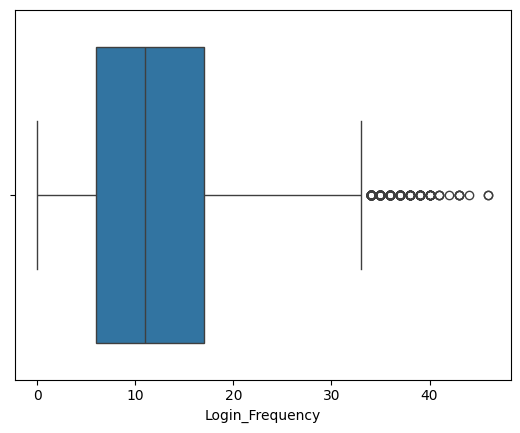

In [14]:
sns.boxplot(x = df['Login_Frequency'])

In [15]:
## Finding IQR
percentile25 = df['Login_Frequency'].quantile(0.25)
percentile75 = df['Login_Frequency'].quantile(0.75)

IQR = percentile75 - percentile25

upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)

print("IQR :", IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

IQR : 11.0
Upper Limit:  33.5
Lower Limit:  -10.5


In [16]:
df_new = df.copy()

df_new['Login_Frequency'] = df['Login_Frequency'].clip(lower_fence, upper_fence)

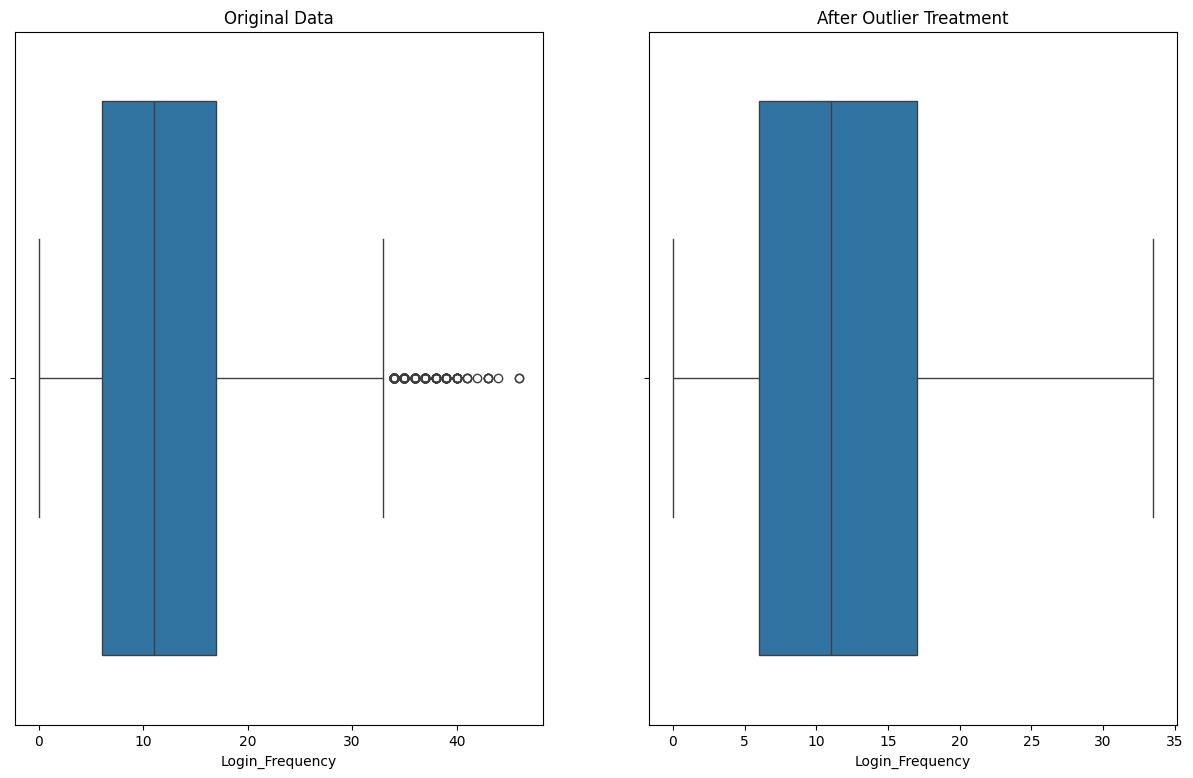

In [19]:
plt.figure(figsize=(15, 9))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Login_Frequency'])
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['Login_Frequency'])
plt.title('After Outlier Treatment')

plt.show()